# Data Science 325

### Learning Objectives:

* Students will learn the motivation for dimensionality reduction techniques.
* Students will be exposed to two algorithmic approaches to dimensionality reduction: principal component analysis (PCA) and t-SNE
* Students will practice the application of PCA with a plot for gaining visual insight into higher-dimensional data.

## load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)

# PCA v LDA

load our data

In [2]:
df_iris = pd.read_csv('http://public.gettysburg.edu/~jpuckett/ds325/data/iris.csv')
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


select the features and scale the data

In [3]:
features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
# Separating out the features
X = df_iris.loc[:, features].values
# Separating out the target
y = df_iris.loc[:,['Species']].values
class_names = np.unique(y)
# Standardizing the features
X_std = StandardScaler().fit_transform(X) #why is it so important to scale before PCA, see hw

## PCA

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std) 

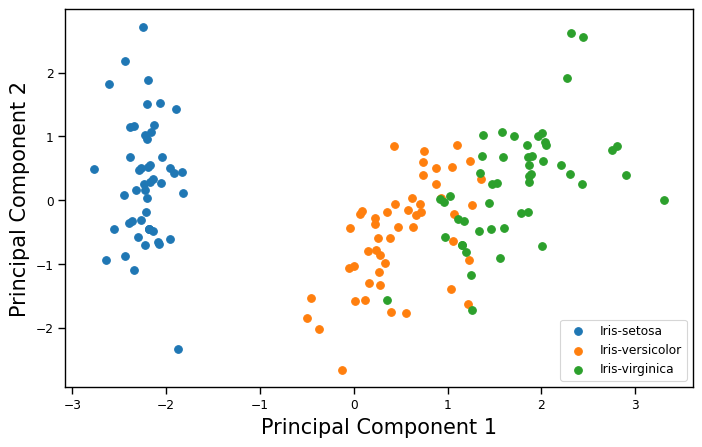

In [5]:
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for target in (class_names):
    inn = (y == target).ravel()
    ax.scatter(X_pca[inn,0],X_pca[inn,1],s=30)
ax.legend(class_names)
plt.show()

## LDA

In [6]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)

c:\Users\quannh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


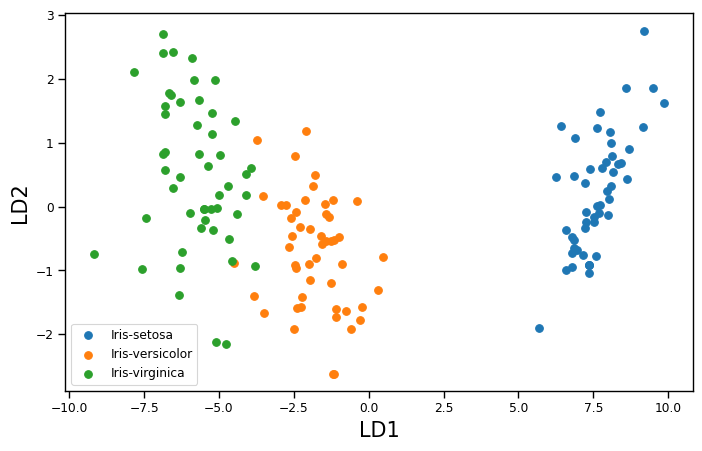

In [7]:
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LD1', fontsize = 15)
ax.set_ylabel('LD2', fontsize = 15)
for target in (class_names):
    inn = (y == target).ravel()
    ax.scatter(X_lda[inn,0],X_lda[inn,1],s=30)
ax.legend(class_names)
plt.show()

# PCA on digits data set

We start by loading the data:

In [8]:
from sklearn.datasets import load_digits
digits, d_labels = load_digits(return_X_y=True)
x = StandardScaler().fit_transform(digits)

## view the data

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. 

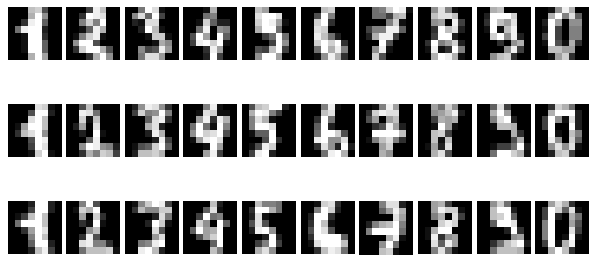

In [9]:
fig = plt.figure(figsize = (10,5),dpi=75)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 31):
    ax = fig.add_subplot(3, 10, i)
    plt.imshow(digits[i].reshape(8,8),cmap='gray')
    ax.axis('off')

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

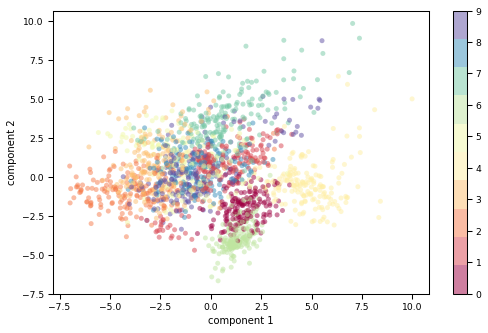

In [11]:
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.scatter(projected[:, 0], projected[:, 1],
            c=d_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

What do the components mean?
We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

## Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

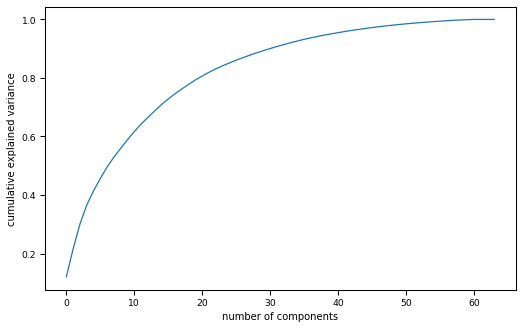

In [12]:
pca = PCA().fit(x)
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### de-noising
Now lets add some random noise to create a noisy dataset, and re-plot it:

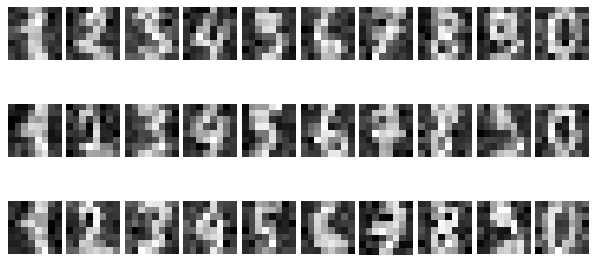

In [13]:
np.random.seed(325)
noisy = np.random.normal(digits, 2)
fig = plt.figure(figsize = (10,5),dpi=75)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 31):
    ax = fig.add_subplot(3, 10, i)
    plt.imshow(noisy[i].reshape(8,8),cmap='gray')
    ax.axis('off')

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [14]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

6

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

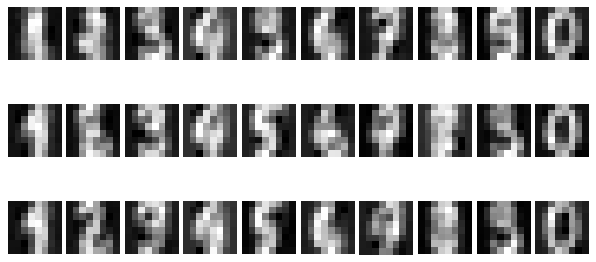

In [15]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
fig = plt.figure(figsize = (10,5),dpi=75)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 31):
    ax = fig.add_subplot(3, 10, i)
    plt.imshow(filtered[i].reshape(8,8),cmap='gray')
    ax.axis('off')

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## t-SNE

Recall, PCA has a "bunching" problem with many of the other digits overlapping one another in 2 dimensions.

t-SNE is an algorithm that seeks to "unfold" points in high dimensions so as to project similar points near to one another in 2D, while holding different points apart. Let us observe how 
t-SNE performs with the same data for different "perplexity" parameter settings.

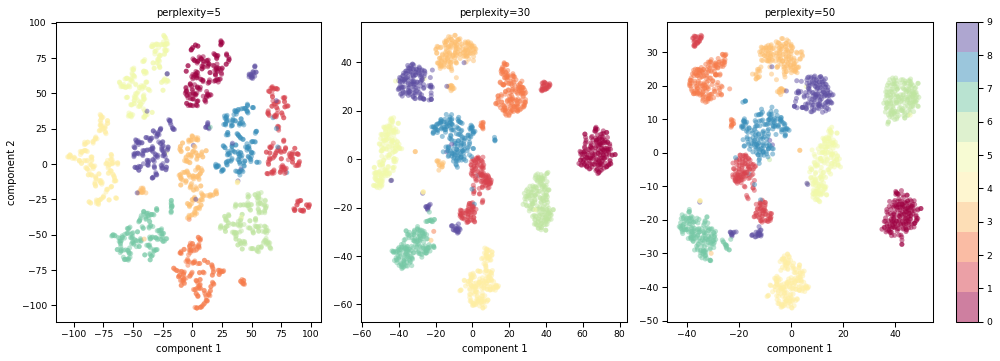

In [16]:
perplexities = [5, 30, 50]  # 30 is the default
fig = plt.figure(figsize = (15,5),dpi=75)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(len(perplexities)):
    p = perplexities[i]
    tsne = TSNE(random_state=0, perplexity=p)
    projected = tsne.fit_transform(digits)  # project from 64 to 2 dimensions
    ax = fig.add_subplot(1, 3, i+1)
    im=ax.scatter(projected[:, 0], projected[:, 1],
                c=d_labels, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 10))  # Note: 'Spectral' must now be capitalized, unlike lowercase 'spectral' in text.
    ax.set_title('perplexity=%d'%p)
    ax.set_xlabel('component 1')
    if (i==0):
        ax.set_ylabel('component 2')
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.88,
                    wspace=0.15, hspace=0.02)
# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8
cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
plt.show()

Note how sensitive t-SNE is to its perplexity parameter. While it achieves good separation of digits data (without digits target values) using different perplexity values, you will note that the spatial relationships change from one value to the next. Some strong similarity relationships are reflected in all runs, but take a moment to observe which digits are deemed most similar to one another in the different plots above.

#### As unsupervised learning tools, dimensionality reduction can help us gain better insight into high-dimensional data in many application areas.

Postscript: We have been sticking fairly close to what is available in numpy, pandas, matplotlib, and sklearn. A newer manifold learning method called UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction has gained in popularity for high-dimensional applications (e.g. for single cell genomics).